In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("BC Inflacion anual.csv")
df.head()

,Fecha,IPC General,IPC SAE,IPC sin volátiles
0,01-01-1996,7.8,7.4,7.40
1,01-02-1996,7.8,7.7,7.62
2,01-03-1996,7.9,7.6,8.08
3,01-04-1996,8.4,7.6,8.11
4,01-05-1996,8.6,7.4,8.74


In [11]:
#verificar informacion general
df.info()
df.isnull().sum()
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              310 non-null    datetime64[ns]
 1   IPC General        310 non-null    float64       
 2   IPC SAE            310 non-null    float64       
 3   IPC sin volátiles  310 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.8 KB


,Fecha,IPC General,IPC SAE,IPC sin volátiles
0,1996-01-01,7.8,7.4,7.40
1,1996-02-01,7.8,7.7,7.62
2,1996-03-01,7.9,7.6,8.08
3,1996-04-01,8.4,7.6,8.11
4,1996-05-01,8.6,7.4,8.74


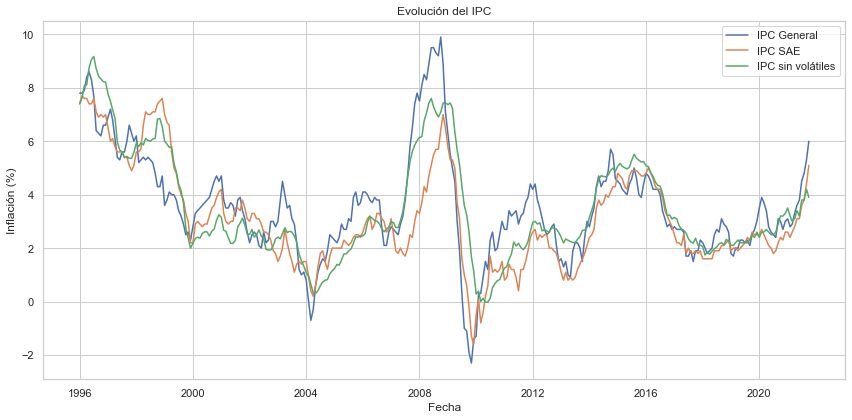

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Graficar IPC General
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fecha', y='IPC General', label='IPC General')
sns.lineplot(data=df, x='Fecha', y='IPC SAE', label='IPC SAE')
sns.lineplot(data=df, x='Fecha', y='IPC sin volátiles', label='IPC sin volátiles')
plt.title('Evolución del IPC')
plt.xlabel('Fecha')
plt.ylabel('Inflación (%)')
plt.legend()
plt.tight_layout()
plt.show()


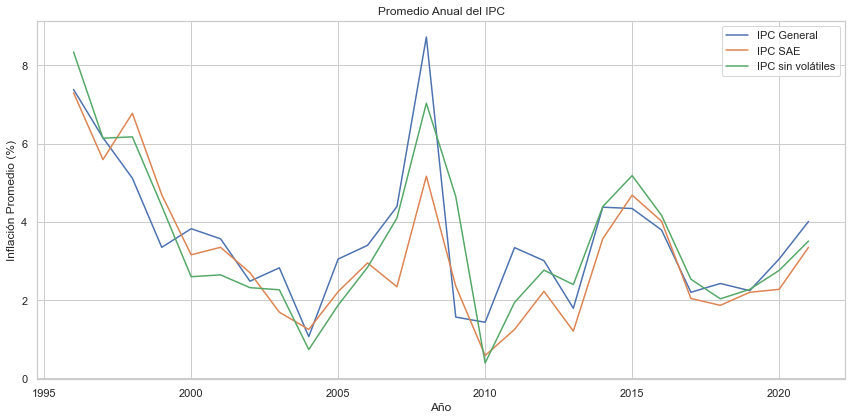

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                26 non-null     int64  
 1   IPC General        26 non-null     float64
 2   IPC SAE            26 non-null     float64
 3   IPC sin volátiles  26 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 960.0 bytes


,Año,IPC General,IPC SAE,IPC sin volátiles
0,1996,7.383333,7.300000,8.341667
1,1997,6.150000,5.591667,6.138333
2,1998,5.116667,6.775000,6.173333
3,1999,3.350000,4.691667,4.404167
4,2000,3.825000,3.158333,2.598333


In [18]:

#ANALISIS ANUAL
#Extraer año
df['Año'] = df['Fecha'].dt.year

# Promedio anual de cada tipo de inflación
promedios_anuales = df.groupby('Año')[['IPC General', 'IPC SAE', 'IPC sin volátiles']].mean().reset_index()


# Graficar promedio anual
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_anuales, x='Año', y='IPC General', label='IPC General')
sns.lineplot(data=promedios_anuales, x='Año', y='IPC SAE', label='IPC SAE')
sns.lineplot(data=promedios_anuales, x='Año', y='IPC sin volátiles', label='IPC sin volátiles')
plt.title('Promedio Anual del IPC')
plt.xlabel('Año')
plt.ylabel('Inflación Promedio (%)')
plt.legend()
plt.tight_layout()
plt.show()
 
promedios_anuales.info() 
promedios_anuales.head()

In [20]:

max_row = df.loc[df["IPC General"].idxmax()]
print("Mayor inflación:", max_row["Año"], "-", max_row["IPC General"], "%")


min_row = df.loc[df["IPC General"].idxmin()]
print("Menor inflación:", min_row["Año"], "-", min_row["IPC General"], "%")


Mayor inflación: 2008 - 9.9 %
Menor inflación: 2009 - -2.3 %
